# ***Abalone*** ***Age*** ***Prediction***

1. **Download** **the** **dataset**: **Dataset** 
2. **Load** **the** **dataset**

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv('/content/abalone.csv')
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


 3.**Perform** **Below** **Visualizations**

 **Univariate** **Analysis**

(array([ 786., 1052.,  962.,  775.,  399.,  123.,   46.,   24.,    7.,
           3.]),
 array([1.0000e-03, 1.4970e-01, 2.9840e-01, 4.4710e-01, 5.9580e-01,
        7.4450e-01, 8.9320e-01, 1.0419e+00, 1.1906e+00, 1.3393e+00,
        1.4880e+00]),
 <a list of 10 Patch objects>)

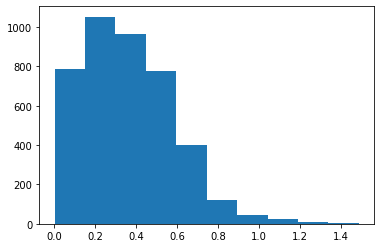

In [9]:

plt.hist(data["Shucked weight"])

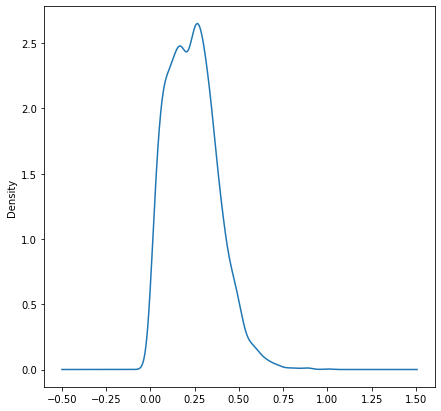

In [11]:
plt.figure(figsize=(7,7))
data["Shell weight"].plot(kind="density")

**Bi-Variate** **Analysis**

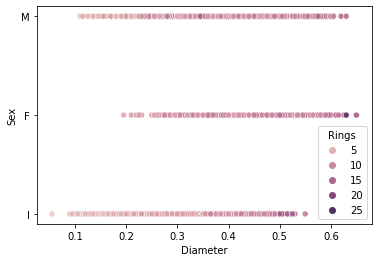

In [13]:
sns.scatterplot(x=data["Diameter"],y=data['Sex'],hue=data["Rings"])

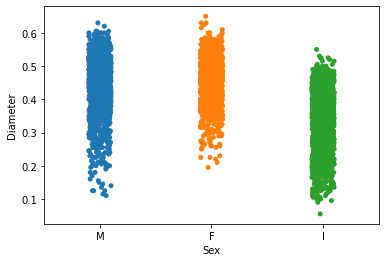

In [14]:
sns.stripplot(x=data["Sex"],y=data["Diameter"])

**Multi-Variate Analysis**

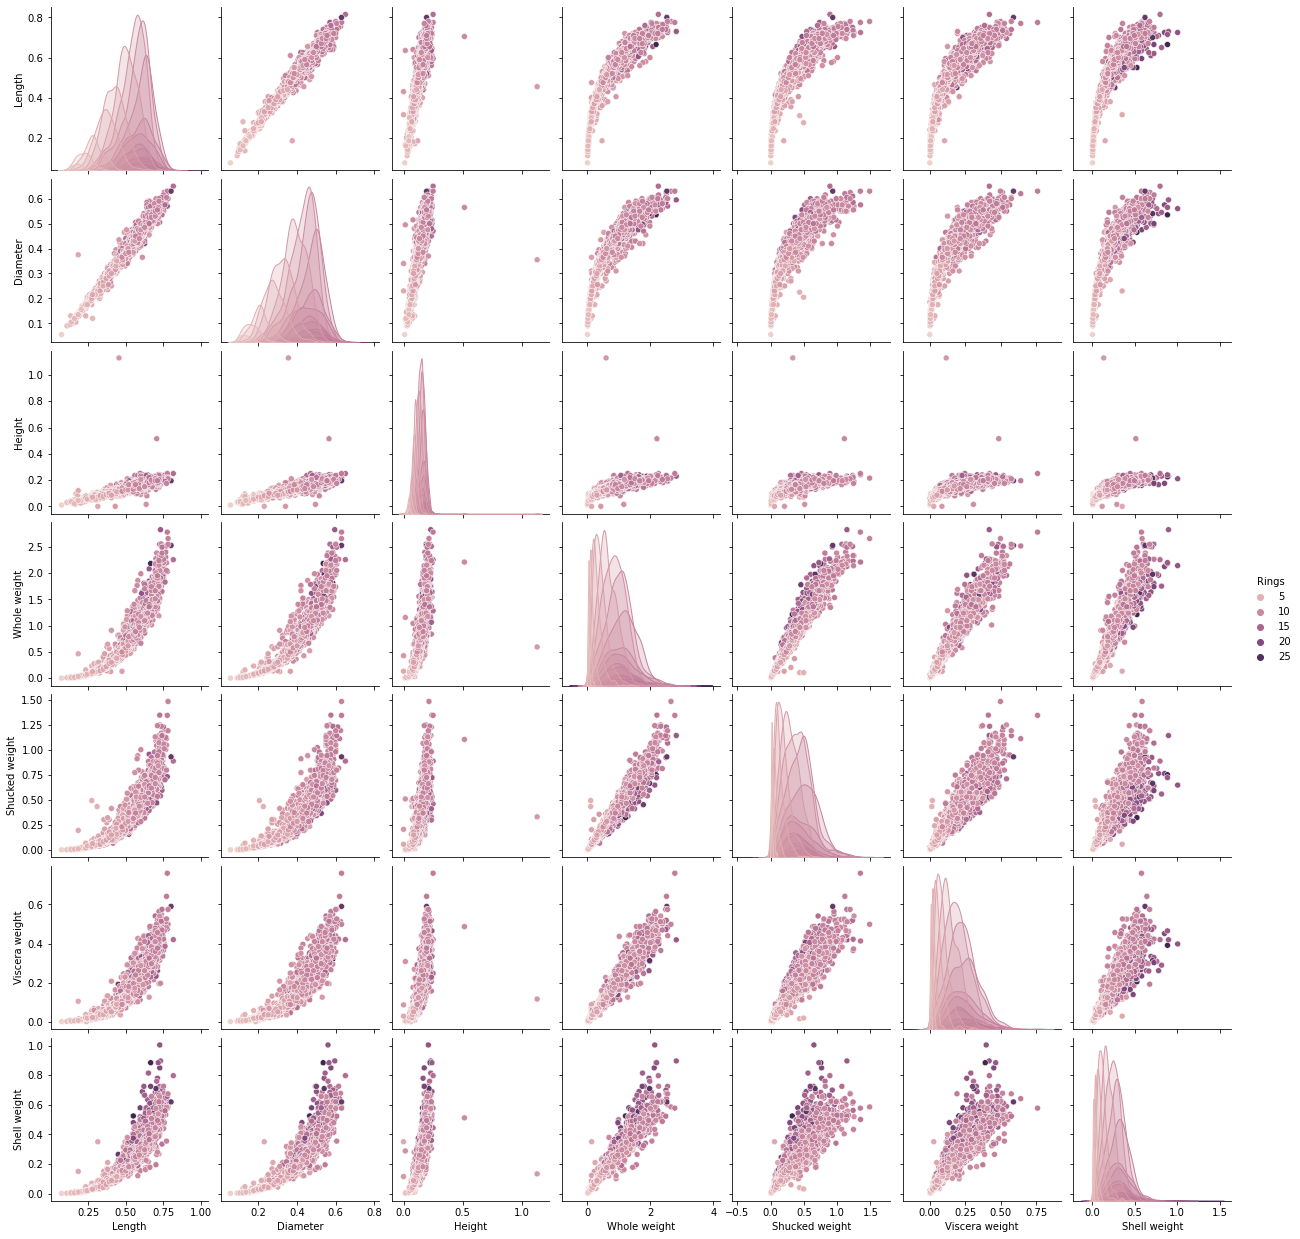

In [15]:
sns.pairplot(data,hue='Rings')

4. **Perform** **descriptive** **statistics** **on** **the** **dataset**

In [16]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


5 .**Handle the Missing values**

In [17]:
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

 6.**Find** **the** **outliers** **and** **replace** **the** **outliers**

In [18]:
for i in data:
    if data[i].dtype=='int64' or data[i].dtypes=='float64':
        q1=data[i].quantile(0.25)
        q3=data[i].quantile(0.75)
        iqr=q3-q1
        upper=q3+1.5*iqr
        lower=q1-1.5*iqr
        data[i]=np.where(data[i] >upper, upper, data[i])
        data[i]=np.where(data[i] <lower, lower, data[i])
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15.0
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7.0
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9.0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10.0
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7.0
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11.0
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10.0
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9.0
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10.0


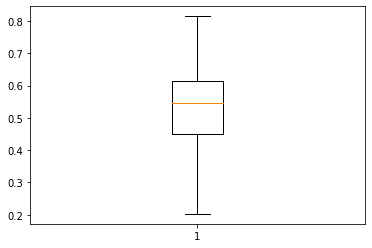

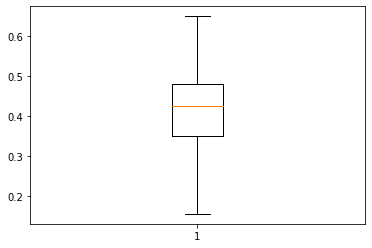

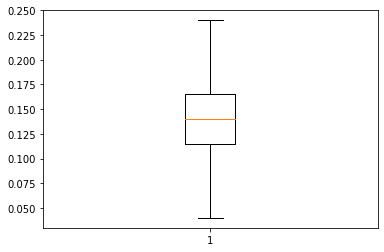

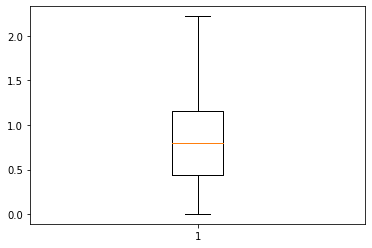

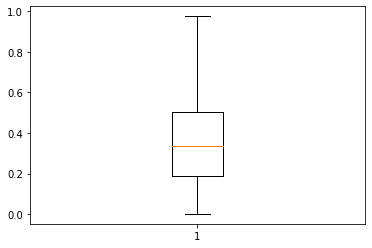

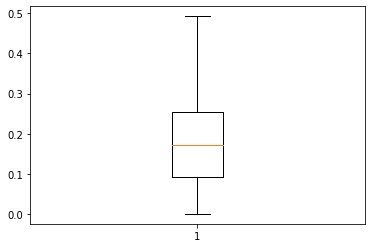

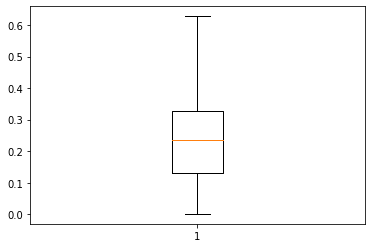

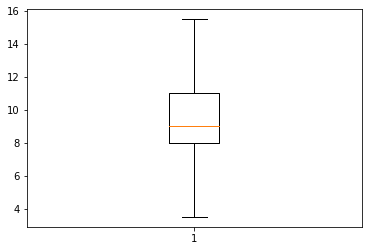

In [19]:
for i in data:
    if data[i].dtype=='int64' or data[i].dtypes=='float64':
        plt.boxplot(data[i])
        plt.show()

 7.**Check** **for** **Categorical** **columns** **and** **perform** **encoding**

In [23]:
x = data.iloc[:,0:-1]
x = pd.get_dummies(x)
x.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0,1,0


8.**Split** **the** **data** **into** **dependent** **and** **independent** **variables**

In [22]:
x = data.iloc[:,0:-1]
y = data.iloc[:,-1]

print(x.shape)
print(y.shape)


(4177, 8)
(4177,)


9.**Scale** **the** **independent** **variables** 

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.25,random_state=0)
sc = StandardScaler()
x_train=sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

x_train = pd.DataFrame(x_train)
x_train.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.562137,-0.666554,-0.913056,-0.796044,-0.762932,-0.804716,-0.836143,-0.680344,1.478568,-0.765915
1,0.877638,0.566612,0.267063,0.393032,0.809321,0.056533,-0.472875,-0.680344,-0.676330,1.305628
2,0.919985,1.080431,0.660436,0.808592,0.664084,1.065160,0.829756,-0.680344,-0.676330,1.305628
3,-1.451409,-1.488665,-1.437554,-1.306237,-1.348492,-1.186981,-1.254453,-0.680344,-0.676330,1.305628
4,1.512833,1.491487,1.447183,1.885550,1.609280,2.207350,2.022305,1.469845,-0.676330,-0.765915


 10.**Split** **the** **data** **into** **training** **and** **testing**

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.25,random_state=0)
print(' x_train.shape : ',x_train.shape)
print(' y_train.shape : ',y_train.shape)
print(' x_test.shape : ',x_test.shape)
print(' y_test.shape : ',y_test.shape)

 x_train.shape :  (3132, 10)
 y_train.shape :  (3132,)
 x_test.shape :  (1045, 10)
 y_test.shape :  (1045,)


11. **Build the Model**

In [29]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

12. **Train the Model**

In [30]:
model.fit(x_train, y_train)

LinearRegression()

13. **Test the Model**

In [35]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

14. **Measure** **the** **performance** **using** **Metrics**.

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
s = mean_squared_error(y_train, y_train_pred)
print('Mean Squared error of training set :%2f'%s)

p = mean_squared_error(y_test, y_test_pred)
print('Mean Squared error of testing set :%2f'%p)

Mean Squared error of training set :3.266950
Mean Squared error of testing set :3.207370
